# 0. Environment setup.

#### Download dataset https://www.kaggle.com/datasets/xairete/car-plates-ocr

In [ ]:
!python -m pip install opendatasets > /dev/null

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/xairete/car-plates-ocr", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: azatnv
Your Kaggle Key: ··········


100%|██████████| 6.05G/6.05G [00:41<00:00, 157MB/s]


#### Setput Python>=3.8 and PyTorch>=1.7

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.8
from IPython.display import clear_output 

clear_output()
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --config python3

!sudo apt install python3-pip
!python -m pip install --upgrade pip

clear_output()
!python --version
!pip --version

Python 3.8.14
pip 22.2.2 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)


#### Download Yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12776, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 12776 (delta 82), reused 83 (delta 39), pack-reused 12633
Receiving objects: 100% (12776/12776), 12.89 MiB | 27.43 MiB/s, done.
Resolving deltas: 100% (8794/8794), done.


In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.2/701.2 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip show torch

Name: torch
Version: 1.12.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.8/dist-packages
Requires: typing-extensions
Required-by: thop, torchvision


#### Wandb

In [ ]:
# !pip install wandb
# !wandb login

In [ ]:
# import wandb

# wandb.init(project="test-project", entity="deep-learning-car-plate-detection")
# wandb.config = {
#   "learning_rate": 0.001,
#   "epochs": 100,
#   "batch_size": 128
# }
# wandb.log({"loss": loss})

# # Optional
# wandb.watch(model)

# 1. Converting "car-plates-ocr" dataset into YOLO format. Saving in /content/drive/MyDrive/car-plates-dataset-yolo-format


In [ ]:
!apt-get install tree > /dev/null
!pip install plotly > /dev/null
!pip install google > /dev/null

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json

with open('/content/car-plates-ocr/data/train.json', 'r') as labels_file:
  raw_labels = json.load(labels_file)
raw_labels = raw_labels[0:25632]

len(raw_labels)

25632

In [ ]:
raw_labels[0]

{'nums': [{'box': [[180, 889], [596, 951], [598, 1056], [185, 983]],
   'text': 'B060BB125'}],
 'file': 'train/0.jpg'}

In [ ]:
print(raw_labels[0]["nums"][0]["box"])
print(raw_labels[0]["nums"][0]["text"])
print(raw_labels[0]["file"])

[[180, 889], [596, 951], [598, 1056], [185, 983]]
B060BB125
train/0.jpg



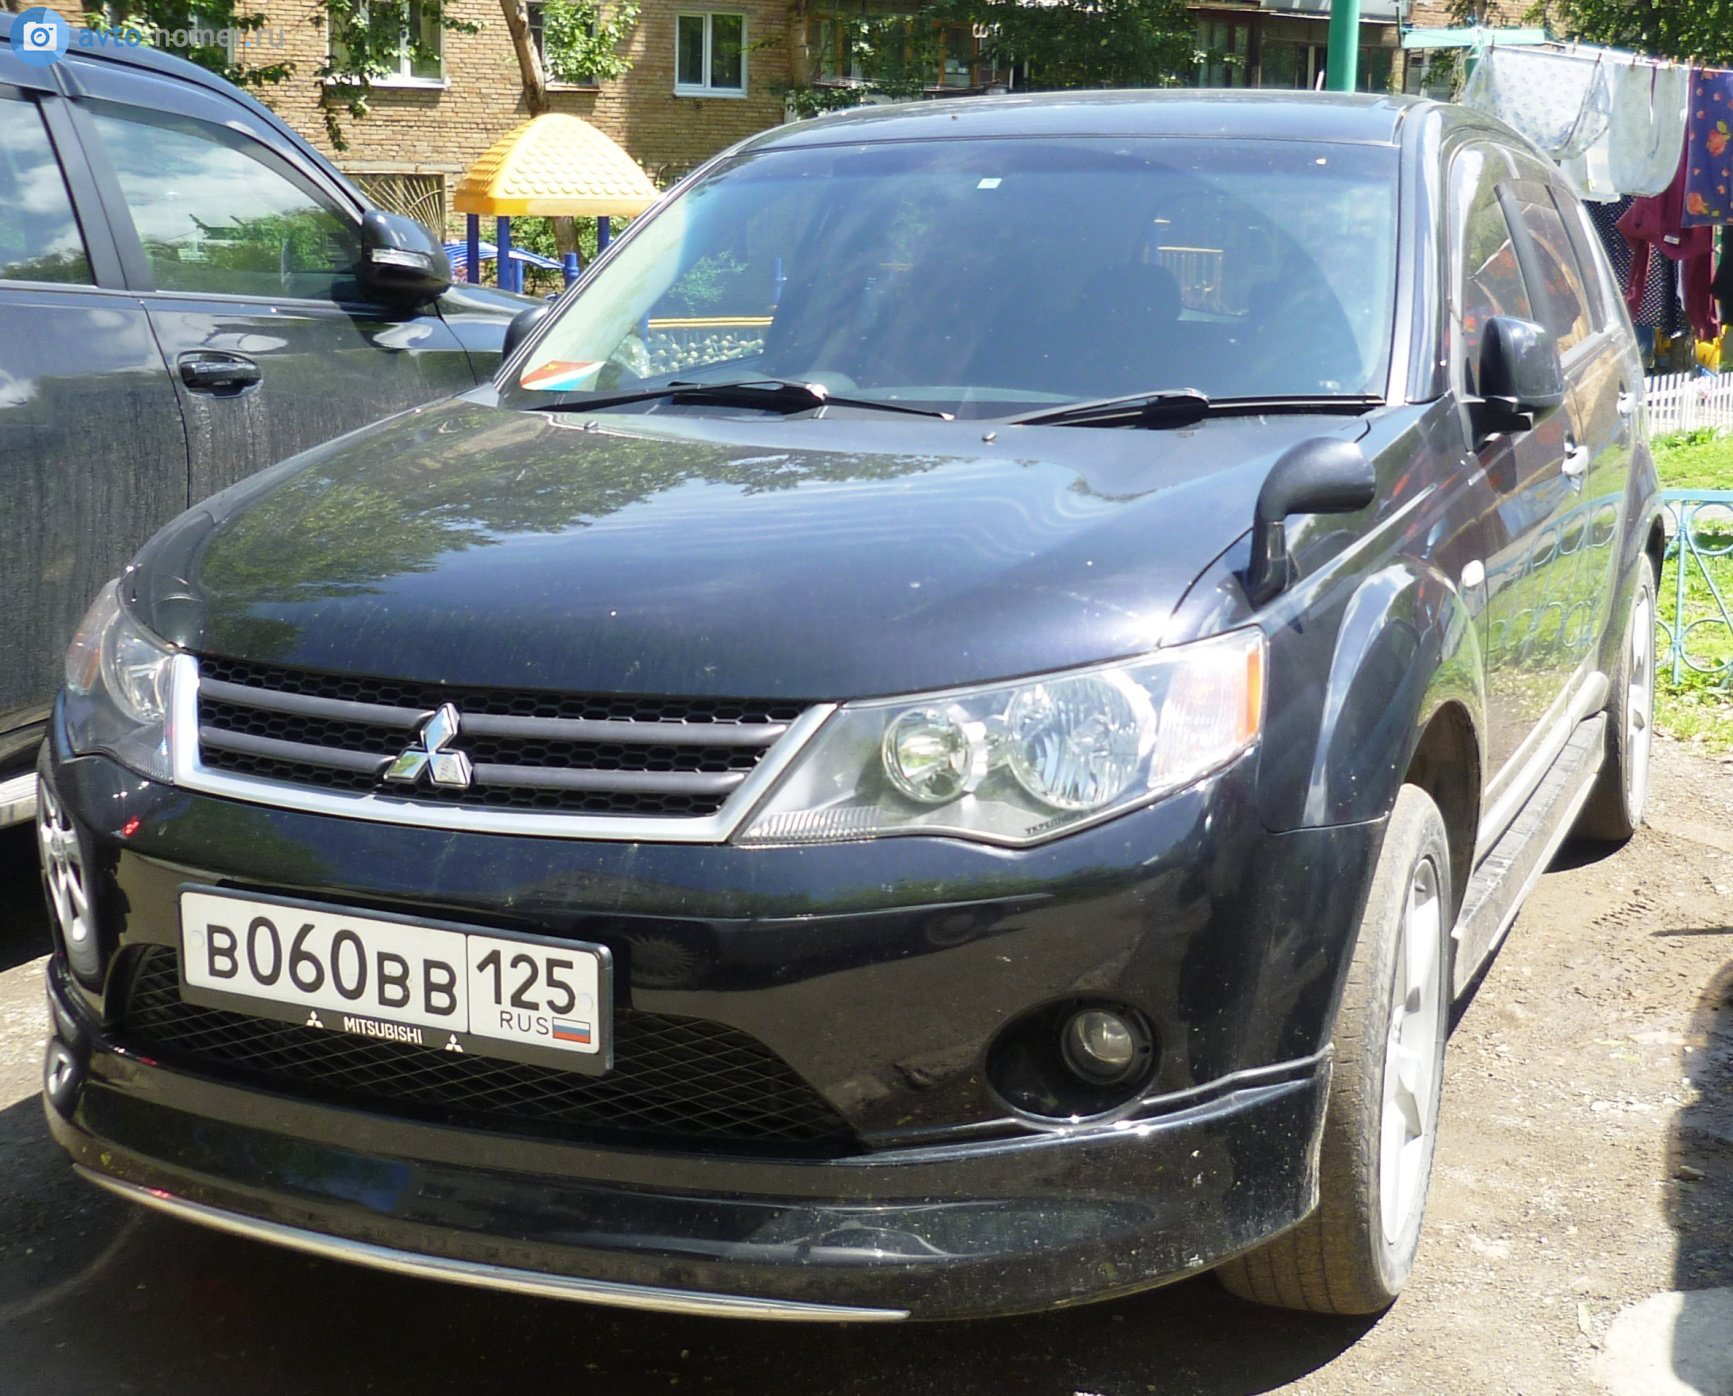

In [ ]:
import plotly.express as px
import matplotlib.image as mpimg
import numpy as np

"""Здесь просто проверяю правильность датасета на первой картинке """

test_view_image = raw_labels[0]

img = mpimg.imread(f"/content/car-plates-ocr/data/{test_view_image['file']}")
imgplot = px.imshow(img)
imgplot.update_layout(width=600, height=500,
                  margin=dict(l=10, r=10, b=10, t=10))

frame_coordinates = test_view_image["nums"][0]["box"]
# [180, 889], [596, 951], [598, 1056], [185, 983]

x0=180
y0=889
x1=598
y1=1056

imgplot.add_shape(
    type='rect',
    x0=x0, y0=y0,
    x1=x1, y1=y1,
    xref='x', yref='y',line_color='yellow')
imgplot.show()

#### 1.1. Разбор датасета car-plates-ocr. Создание датасета для Yolov5

In [ ]:
from PIL import Image
from typing import List, Tuple


def transform_coords_to_yolo_format(four_coords: List[List[int]], 
                                    img_width: int, 
                                    img_height: int) -> Tuple[float]:

  max_diagonal = [[0,0],[0,0]]

  diagonal_1_length = (four_coords[0][0] - four_coords[2][0]) ** 2 + \
                      (four_coords[0][1] - four_coords[2][1]) ** 2
  diagonal_2_length = (four_coords[1][0] - four_coords[3][0]) ** 2 + \
                      (four_coords[1][1] - four_coords[3][1]) ** 2

  if diagonal_1_length > diagonal_2_length:
    max_diagonal = [four_coords[0], four_coords[2]]
  else:
    max_diagonal = [four_coords[1], four_coords[3]]

  X_center = round(((max_diagonal[0][0] + max_diagonal[1][0]) / 2) / img_width, 6)
  Y_center = round(((max_diagonal[0][1] + max_diagonal[1][1]) / 2) / img_height, 6)

  box_width = round(abs(max_diagonal[0][0] - max_diagonal[1][0]) / img_width, 6)
  box_height = round(abs(max_diagonal[0][1] - max_diagonal[1][1]) / img_height, 6)

  return X_center, Y_center, box_width, box_height


def transform_raw_labels_to_yolo_labels(labels: dict) -> List[dict]:

  transformed_labels = []

  for label in labels:
    img_file_name = label["file"].split('/')[1]

    with Image.open(f"/content/car-plates-ocr/data/train/{img_file_name}") as img:
      img_width, img_height = img.size

    nums = []
    for number in label["nums"]:
      license_plate_number = number["text"]
      box_with_four_coordinates = number["box"]

      X_center,Y_center,box_width,box_height = transform_coords_to_yolo_format(
          box_with_four_coordinates,
          img_width, img_height
      )

      nums.append({'box': [X_center,Y_center,box_width,box_height], 
                   'text': license_plate_number})
    
    transformed_labels.append({'nums': nums, 'file': f"{img_file_name}"})

  return transformed_labels


labels = transform_raw_labels_to_yolo_labels(raw_labels)
labels[0:1]

[{'nums': [{'box': [0.224466, 0.696633, 0.2412, 0.119628],
    'text': 'B060BB125'}],
  'file': '0.jpg'}]

In [ ]:
import random


def save_images_and_labels(
    dataset: List[List[dict]], 
    folder: str,
    images_save_path: str,
    labels_save_path: str):
  
  for label in dataset:
    img_file_name = label["file"]
    img_file_number = img_file_name.split('.')[0]

    with Image.open(f"/content/car-plates-ocr/data/train/{img_file_name}") as img:
      if img.mode == "RGBA":
        img = img.convert('RGB')
      img.save(f"{images_save_path}/{folder}/{img_file_number}.jpg")

    for number in label["nums"]:
      box = number["box"]
      with open(f"{labels_save_path}/{folder}/{img_file_number}.txt", "a") as label_file:
        label_file.write(f"0 {box[0]} {box[1]} {box[2]} {box[3]}")


def make_yolo_dataset_in_gdrive(
    labels: List[List[dict]],
    dataset_len = 1000,
    train_len = 700,
    val_len = 200,
    images_save_path = "/content/drive/MyDrive/car-plates-dataset-yolo-format/images",
    labels_save_path = "/content/drive/MyDrive/car-plates-dataset-yolo-format/labels"):

  dataset = random.choices(labels, k=dataset_len)

  train = dataset[0:train_len]
  val = dataset[train_len:train_len + val_len]
  test = dataset[train_len + val_len:]
  
  save_images_and_labels(train, "train", images_save_path, labels_save_path)
  save_images_and_labels(val, "validation", images_save_path, labels_save_path)
  save_images_and_labels(test, "test", images_save_path, labels_save_path)

  with open(f'{images_save_path}/dataset.json', 'w', encoding='utf-8') as f:
    json.dump({"train_labels": train, "validation_labels": val, "test_labels": test}, f, indent=4)

  return train, val, test

In [ ]:
%cd /content
%rm -r drive/MyDrive/car-plates-dataset-yolo-format
%mkdir drive/MyDrive/car-plates-dataset-yolo-format

%mkdir drive/MyDrive/car-plates-dataset-yolo-format/images
%mkdir drive/MyDrive/car-plates-dataset-yolo-format/images/train
%mkdir drive/MyDrive/car-plates-dataset-yolo-format/images/validation
%mkdir drive/MyDrive/car-plates-dataset-yolo-format/images/test

%mkdir drive/MyDrive/car-plates-dataset-yolo-format/labels
%mkdir drive/MyDrive/car-plates-dataset-yolo-format/labels/train
%mkdir drive/MyDrive/car-plates-dataset-yolo-format/labels/validation
%mkdir drive/MyDrive/car-plates-dataset-yolo-format/labels/test

dataset = make_yolo_dataset_in_gdrive(labels)

In [ ]:
train, val, test = dataset
print(len(train),len(val),len(test))

700 200 100


In [ ]:
!tree drive/MyDrive/car-plates-dataset-yolo-format/ -d

drive/MyDrive/car-plates-dataset-yolo-format/
├── images
│   ├── test
│   ├── train
│   └── validation
└── labels
    ├── test
    ├── train
    └── validation

8 directories


# 2. Обучение модели Yolov5 на нашем наборе.

In [ ]:
!pip install gdown > /dev/null

%cd /content/yolov5

%mkdir mydata

!gdown https://drive.google.com/file/d/1X714KcFQ2HbHegVXhMGyz5jXKUTMq-Al/view?usp=sharing -O mydata/car-plates.yaml --fuzzy

!gdown https://drive.google.com/file/d/1KgKUtrtU3e2-oKPekY26QFLJhFGEkHur/view?usp=sharing -O mydata/yolov5n.yaml --fuzzy
!gdown https://drive.google.com/file/d/1EcP2eGphfqe4KGsQaTEeUakifhMWOrac/view?usp=sharing -O mydata/yolov5s.yaml --fuzzy
!gdown https://drive.google.com/file/d/1whQDYEi7TVf37WRjNK3OPtMll69rxEoF/view?usp=sharing -O mydata/yolov5m.yaml --fuzzy

/content/yolov5
Downloading...
From: https://drive.google.com/uc?id=1X714KcFQ2HbHegVXhMGyz5jXKUTMq-Al
To: /content/yolov5/mydata/car-plates.yaml
100% 683/683 [00:00<00:00, 1.04MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KgKUtrtU3e2-oKPekY26QFLJhFGEkHur
To: /content/yolov5/mydata/yolov5n.yaml
100% 1.40k/1.40k [00:00<00:00, 1.98MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EcP2eGphfqe4KGsQaTEeUakifhMWOrac
To: /content/yolov5/mydata/yolov5s.yaml
100% 1.40k/1.40k [00:00<00:00, 2.69MB/s]
Downloading...
From: https://drive.google.com/uc?id=1whQDYEi7TVf37WRjNK3OPtMll69rxEoF
To: /content/yolov5/mydata/yolov5m.yaml
100% 1.40k/1.40k [00:00<00:00, 2.89MB/s]


In [ ]:
%cd /content/yolov5

!python train.py --data mydata/car-plates.yaml --cfg mydata/yolov5n.yaml --weights yolov5n.pt --epochs 30 --batch-size -1 --name yolov5n_30epochs_-1batchsize_car-plates --cache

/content/yolov5
train: weights=yolov5n.pt, cfg=mydata/yolov5n.yaml, data=mydata/car-plates.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5n_car-plates, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-172-gc4c0ee8 Python-3.8.14 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anc

In [ ]:
%cp -av "/content/yolov5/runs/train/yolov5n_30epochs_-1batchsize_car-plates" "/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates"

'/content/yolov5/runs/train/yolov5n_30epochs_-1batchsize_car-plates' -> '/content/drive/My Drive/yolov5n_30epochs_-1batchsize_car-plates'
'/content/yolov5/runs/train/yolov5n_30epochs_-1batchsize_car-plates/hyp.yaml' -> '/content/drive/My Drive/yolov5n_30epochs_-1batchsize_car-plates/hyp.yaml'
'/content/yolov5/runs/train/yolov5n_30epochs_-1batchsize_car-plates/opt.yaml' -> '/content/drive/My Drive/yolov5n_30epochs_-1batchsize_car-plates/opt.yaml'
'/content/yolov5/runs/train/yolov5n_30epochs_-1batchsize_car-plates/events.out.tfevents.1664205902.1946c95d2263.2311.0' -> '/content/drive/My Drive/yolov5n_30epochs_-1batchsize_car-plates/events.out.tfevents.1664205902.1946c95d2263.2311.0'
'/content/yolov5/runs/train/yolov5n_30epochs_-1batchsize_car-plates/labels_correlogram.jpg' -> '/content/drive/My Drive/yolov5n_30epochs_-1batchsize_car-plates/labels_correlogram.jpg'
'/content/yolov5/runs/train/yolov5n_30epochs_-1batchsize_car-plates/labels.jpg' -> '/content/drive/My Drive/yolov5n_30epochs_-

In [ ]:
!python detect.py --weights runs/train/yolov5n_30epochs_-1batchsize_car-plates/weights/best.pt --conf 0.4 --source ../drive/MyDrive/car-plates-dataset-yolo-format/images/test/

detect: weights=['runs/train/yolov5n_30epochs_-1batchsize_car-plates/weights/best.pt'], source=../drive/MyDrive/car-plates-dataset-yolo-format/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-172-gc4c0ee8 Python-3.8.14 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/100 /content/drive/MyDrive/car-plates-dataset-yolo-format/images/test/10103.jpg: 448x640 1 license car plate, 5.6ms
image 2/100 /content/drive/MyDrive/car-plates-dataset-yolo-format/images/test/10306.jpg: 480x640 2 license car plates, 26.1ms
image 3/100 /conten

In [ ]:
%cp -av "/content/yolov5/runs/detect/exp" "/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp"

'/content/yolov5/runs/detect/exp' -> '/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp'
'/content/yolov5/runs/detect/exp/10103.jpg' -> '/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp/10103.jpg'
'/content/yolov5/runs/detect/exp/10306.jpg' -> '/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp/10306.jpg'
'/content/yolov5/runs/detect/exp/1047.jpg' -> '/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp/1047.jpg'
'/content/yolov5/runs/detect/exp/10961.jpg' -> '/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp/10961.jpg'
'/content/yolov5/runs/detect/exp/11061.jpg' -> '/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp/11061.jpg'
'/content/yolov5/runs/detect/exp/11712.jpg' -> '/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp/11712.jpg'
'/content/yolov5/runs/detect/exp/11859.jpg' -> '/content/drive/MyDrive/yolov5n_30epochs_-1batchsize_car-plates/exp/11859.jpg'
'/content/yolo

In [ ]:
!pip install yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.1/940.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=117185 sha256=7b48a890fa387097513c9f97014ccfd4664639c9a89dc6a0924397903b66b415
  Stored in directory: /root/.cache/pip/wheels/1f/10/06/2a990ee4d

In [ ]:
from yolov5.utils import plot_results

plot_results()

ImportError: ignored